# Comprehensive Machine Learning Models Comparison
## Breast Cancer Classification with Model Persistence

This notebook provides a comprehensive comparison of multiple machine learning algorithms for breast cancer classification using the Wisconsin Breast Cancer dataset. It includes:

- **Shared Data Processing Pipeline**: Consistent data preprocessing for all models
- **Multiple ML Algorithms**: Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest
- **Model Persistence**: Save/Load functionality for trained models
- **Comprehensive Evaluation**: Performance metrics, visualizations, and cross-validation
- **Hyperparameter Tuning**: Optimization for best performing models
- **Feature Analysis**: Importance analysis and model interpretability

**Maintainable Code Structure**: All models use the same preprocessing pipeline and evaluation framework to ensure consistency and reduce code duplication.

## 1. Import Required Libraries

In [ ]:
# Import our custom modules
from data_processor import load_and_explore_data, preprocess_data
from model_trainer import train_and_evaluate_model, analyze_feature_importance, optimize_knn_k
from visualizer import (plot_confusion_matrix, plot_decision_boundary, plot_feature_importance,
                        plot_knn_analysis, plot_svm_comparison, plot_tree_models_comparison)
from model_persistence import save_model, load_model, save_all_models, load_model_by_name
from model_comparison import (create_comparison_dataframe, display_detailed_comparison,
                            plot_comprehensive_comparison, generate_model_summary_report,
                            create_performance_radar_chart)

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("All modules imported successfully!")

All modules imported successfully!


## 2. Data Loading and Exploration

In [3]:
# Load and explore the dataset
dataset_path = "../Dataset/breast_cancer_wisconsin.csv"
dataset, feature_names = load_and_explore_data(dataset_path)

print("✅ Data loaded and explored successfully!")
print(f"Dataset shape: {dataset.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of samples: {dataset.shape[0]}")

Dataset Information:
Dataset shape: (699, 10)
Number of features: 8
Number of samples: 699

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB

First 5 rows:
   Clump_thickness  Uniform

## 3. Data Preprocessing Pipeline

In [4]:
# Preprocess data using our module
X_train, X_test, y_train, y_test, scaler = preprocess_data(dataset, feature_names)

print("✅ Data preprocessing completed successfully!")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Number of features: {len(feature_names)}")

Number of null data after processing:
__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Declaring features and dependent variables...
On the features, remove the 'Sample code number' because it is not relevant to the prediction
Features (X) shape: (683, 8)
Target (y) shape: (683,)

Splitting the dataset into Training set and Test set...
DataSet Splitting:
_______________________________
X_train:  4368
X_test:  1096
y_train: 546
y_test 137

Feature Scaling...
Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 8)
X_test shape: (137, 8)

Training set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747,

## 4. Model Training and Evaluation Framework

In [4]:
# Initialize results storage
model_results = {}
all_models = {}

print("✅ Model training framework ready!")
print("Using functions from model_trainer.py:")
print("- train_and_evaluate_model(): Train and evaluate any model")
print("Using functions from visualizer.py:")  
print("- plot_confusion_matrix(): Visualize confusion matrix")
print("- plot_decision_boundary(): Show decision boundary")
print("Storage:")
print("- model_results: Dictionary to store all results")
print("- all_models: Dictionary to store trained models")

✅ Model training framework ready!
Using functions from model_trainer.py:
- train_and_evaluate_model(): Train and evaluate any model
Using functions from visualizer.py:
- plot_confusion_matrix(): Visualize confusion matrix
- plot_decision_boundary(): Show decision boundary
Storage:
- model_results: Dictionary to store all results
- all_models: Dictionary to store trained models


## 5. Logistic Regression Implementation

In [5]:
# Create and train Logistic Regression model
logistic_model = LogisticRegression(random_state=0)
lr_results = train_and_evaluate_model(
    logistic_model, "Logistic Regression", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Logistic Regression'] = lr_results
all_models['Logistic Regression'] = logistic_model


Training and Evaluating: Logistic Regression
Training Time: 0.0349 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9492
Recall: 0.9489
F1-Score: 0.9490
ROC AUC: 0.9929
Overfitting: 0.0218

Confusion Matrix:
[[83  4]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



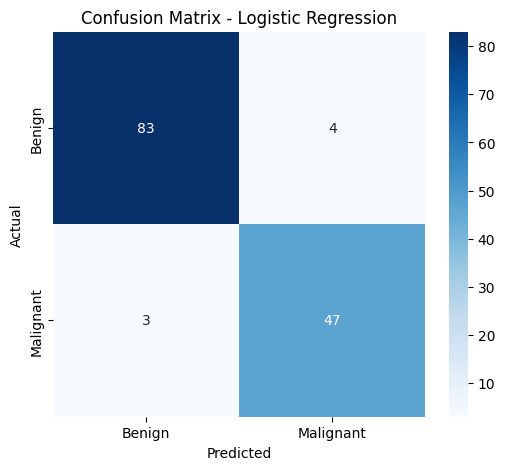

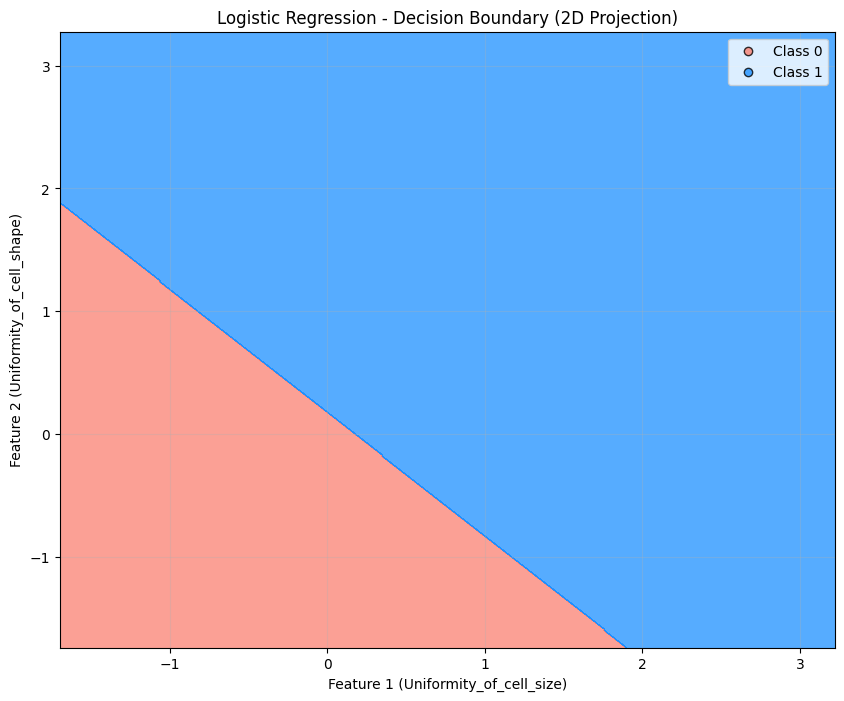

In [6]:
# Visualize Logistic Regression results using our modules
plot_confusion_matrix(lr_results, figsize=(6, 5))
plot_decision_boundary(logistic_model, "Logistic Regression", X_train, y_train, feature_names)


Logistic Regression Feature Importance Analysis:
Top 5 Important Features (by absolute coefficient):
1. Bare_nuclei              :   1.4235 (|1.4235|)
2. Bland_chromatin          :   1.0878 (|1.0878|)
3. Uniformity_of_cell_shape :   0.9193 (|0.9193|)
4. Normal_nucleoli          :   0.8379 (|0.8379|)
5. Mitoses                  :   0.7110 (|0.7110|)


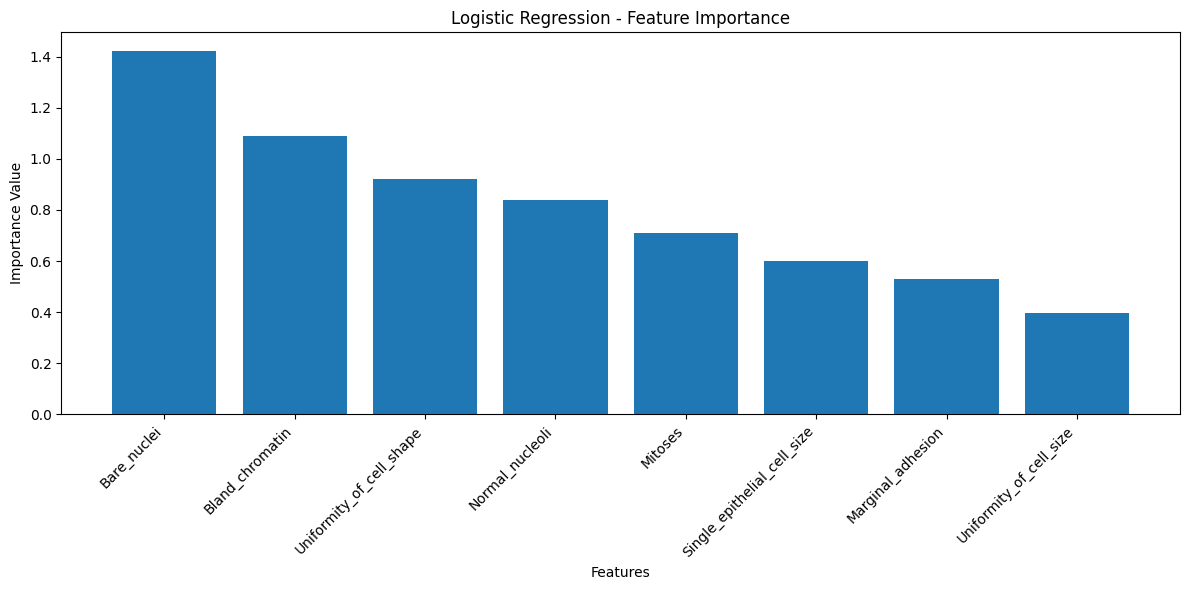


Logistic Regression Summary:
✓ Test Accuracy: 0.9489
✓ F1-Score: 0.9490
✓ Training Time: 0.0349s
✓ Overfitting: 0.0218


In [7]:
# Analyze feature importance using our module
feature_importance_lr = analyze_feature_importance(logistic_model, feature_names, 'Logistic Regression')

# Plot feature importance using our module
plot_feature_importance(feature_importance_lr, 'Logistic Regression', figsize=(12, 6))

print(f"\nLogistic Regression Summary:")
print(f"✓ Test Accuracy: {lr_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {lr_results['f1_score']:.4f}")
print(f"✓ Training Time: {lr_results['training_time']:.4f}s")
print(f"✓ Overfitting: {lr_results['overfitting']:.4f}")

## 6. K-Nearest Neighbors Implementation

In [8]:
# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = train_and_evaluate_model(
    knn_model, "K-Nearest Neighbors", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['KNN'] = knn_results
all_models['KNN'] = knn_model


Training and Evaluating: K-Nearest Neighbors
Training Time: 0.0161 seconds
Prediction Time: 0.0813 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9562
Precision: 0.9586
Recall: 0.9562
F1-Score: 0.9565
ROC AUC: 0.9728
Overfitting: 0.0145

Confusion Matrix:
[[82  5]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.94      0.96        87
           4       0.91      0.98      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



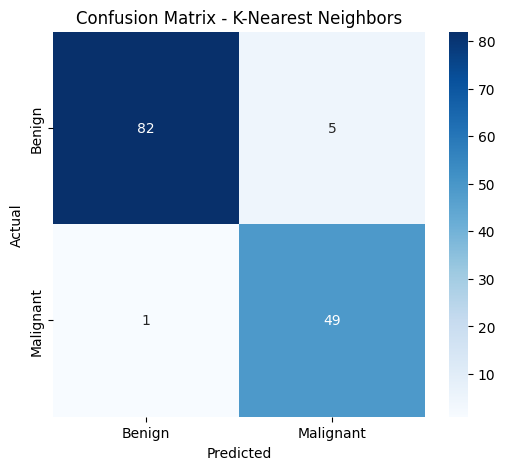

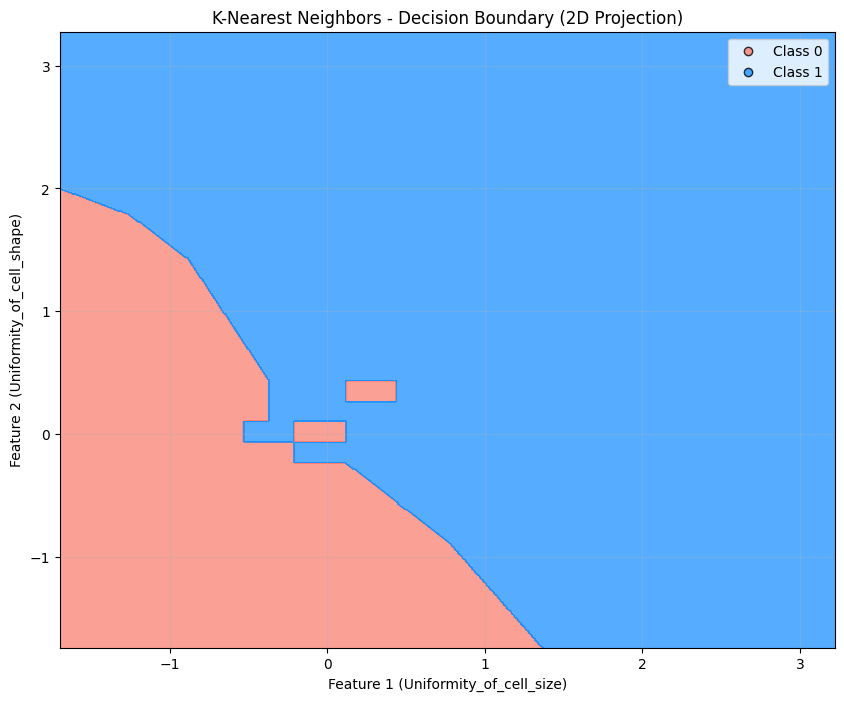

In [9]:
# Visualize KNN results using our modules
plot_confusion_matrix(knn_results, figsize=(6, 5))
plot_decision_boundary(knn_model, "K-Nearest Neighbors", X_train, y_train, feature_names)

In [10]:
# KNN K-value optimization using our module
k_results, optimal_k = optimize_knn_k(X_train, X_test, y_train, y_test)


K-value Optimization:
k= 3: Train=0.9670, Test=0.9489, Overfitting=0.0181
k= 5: Train=0.9707, Test=0.9562, Overfitting=0.0145
k= 7: Train=0.9689, Test=0.9635, Overfitting=0.0054
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k= 7: Train=0.9689, Test=0.9635, Overfitting=0.0054
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)


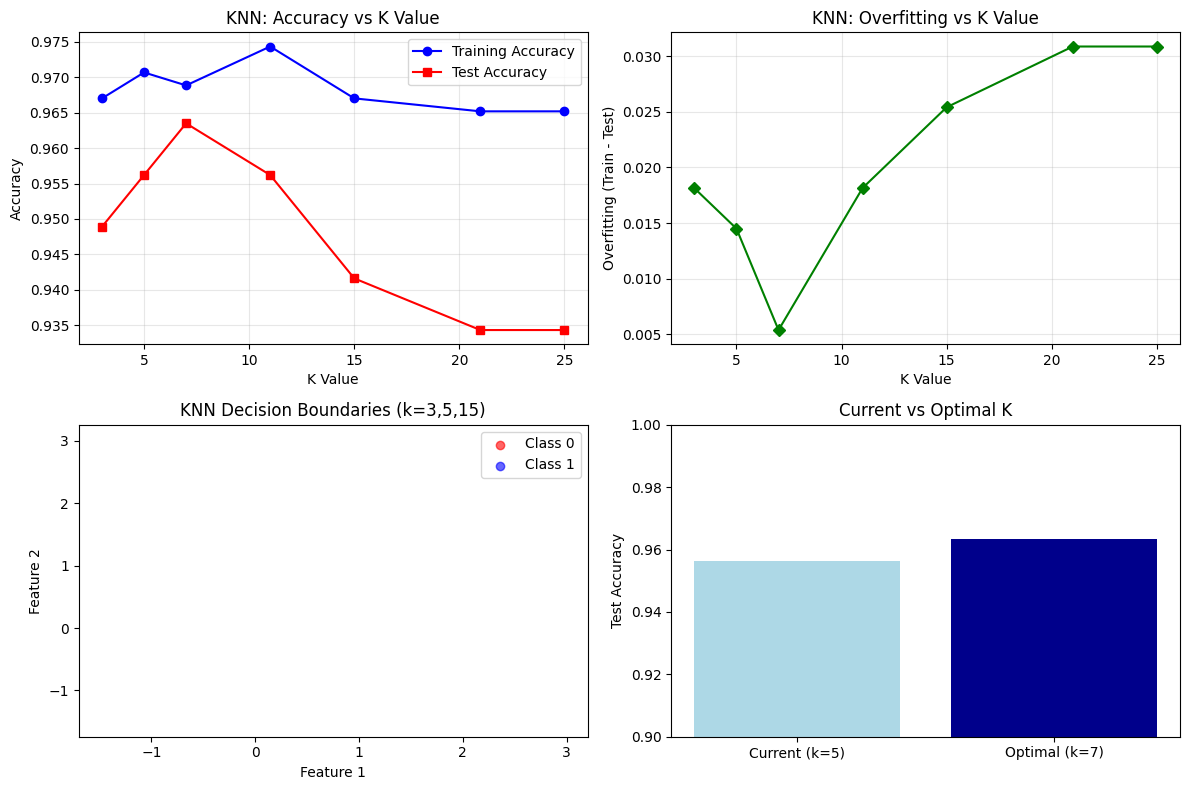


KNN Summary:
✓ Test Accuracy: 0.9562
✓ F1-Score: 0.9565
✓ Training Time: 0.0161s
✓ Overfitting: 0.0145
✓ Optimal K: 7


In [11]:
# Plot KNN analysis using our module
plot_knn_analysis(k_results, knn_results, X_train, y_train, optimal_k)

print(f"\nKNN Summary:")
print(f"✓ Test Accuracy: {knn_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {knn_results['f1_score']:.4f}")
print(f"✓ Training Time: {knn_results['training_time']:.4f}s")
print(f"✓ Overfitting: {knn_results['overfitting']:.4f}")
print(f"✓ Optimal K: {optimal_k}")

## 7. Support Vector Machine Implementation

In [18]:
# Linear SVM
svm_linear = SVC(kernel='linear', random_state=0)
svm_linear_results = train_and_evaluate_model(
    svm_linear, "SVM (Linear)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM Linear'] = svm_linear_results
all_models['SVM Linear'] = svm_linear


Training and Evaluating: SVM (Linear)
Training Time: 0.0260 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9725
Test Accuracy: 0.9562
Precision: 0.9570
Recall: 0.9562
F1-Score: 0.9564
ROC AUC: 0.9899
Overfitting: 0.0163

Confusion Matrix:
[[83  4]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



In [19]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf_results = train_and_evaluate_model(
    svm_rbf, "SVM (RBF)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM RBF'] = svm_rbf_results
all_models['SVM RBF'] = svm_rbf


Training and Evaluating: SVM (RBF)
Training Time: 0.0076 seconds
Prediction Time: 0.0190 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9504
Recall: 0.9489
F1-Score: 0.9492
ROC AUC: 0.9853
Overfitting: 0.0218

Confusion Matrix:
[[82  5]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        87
           4       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



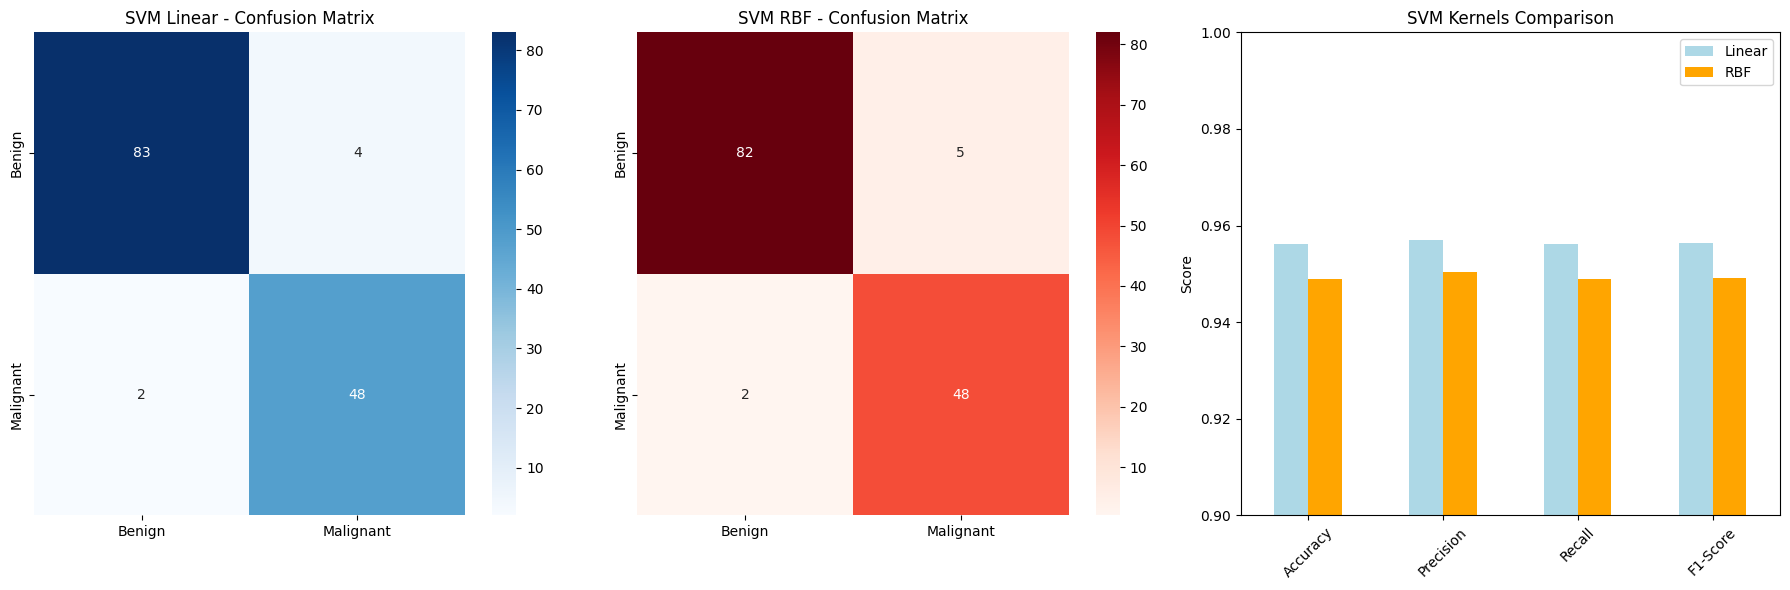

In [20]:
# SVM Models Comparison Visualization using our module
plot_svm_comparison(svm_linear_results, svm_rbf_results)

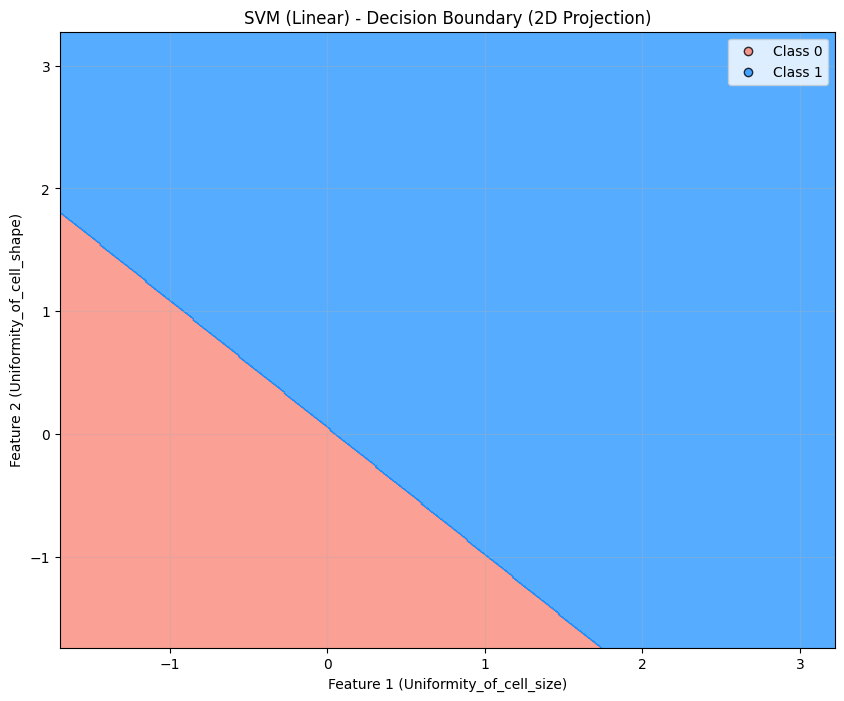

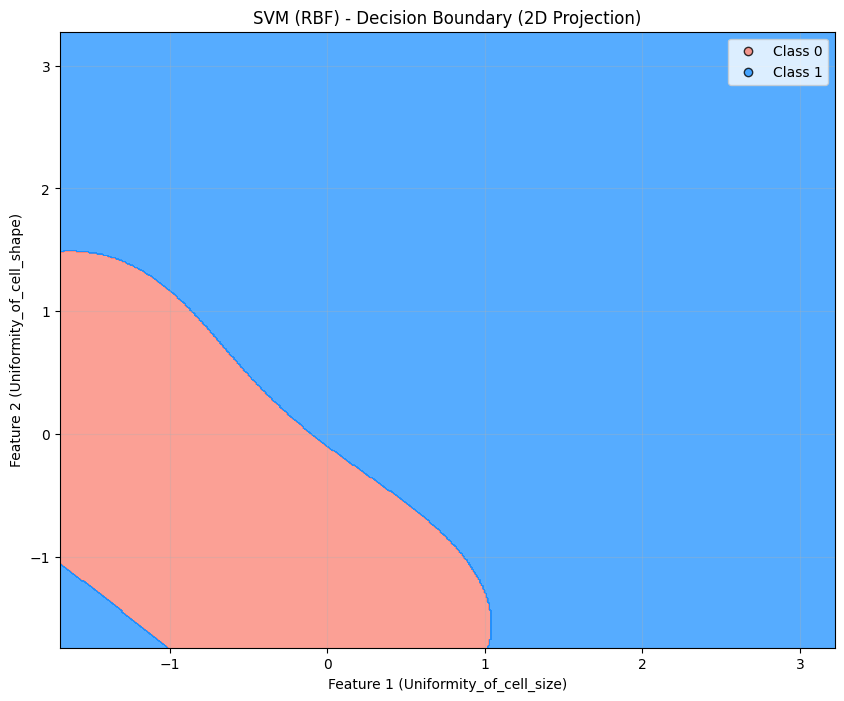


SVM Comparison Summary:
Linear SVM - Test Accuracy: 0.9562
RBF SVM    - Test Accuracy: 0.9489
Linear SVM - Training Time: 0.0228s
RBF SVM    - Training Time: 0.0101s


In [21]:
# SVM Decision Boundaries using our module  
plot_decision_boundary(svm_linear, "SVM (Linear)", X_train, y_train, feature_names)
plot_decision_boundary(svm_rbf, "SVM (RBF)", X_train, y_train, feature_names)

print(f"\nSVM Comparison Summary:")
print("=" * 30)
print(f"Linear SVM - Test Accuracy: {svm_linear_results['test_accuracy']:.4f}")
print(f"RBF SVM    - Test Accuracy: {svm_rbf_results['test_accuracy']:.4f}")
print(f"Linear SVM - Training Time: {svm_linear_results['training_time']:.4f}s")
print(f"RBF SVM    - Training Time: {svm_rbf_results['training_time']:.4f}s")

## 8. Decision Tree and Random Forest Implementation

In [20]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_results = train_and_evaluate_model(
    dt_model, "Decision Tree", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Decision Tree'] = dt_results
all_models['Decision Tree'] = dt_model


Training and Evaluating: Decision Tree
Training Time: 0.0154 seconds
Prediction Time: 0.0018 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.9416
Precision: 0.9425
Recall: 0.9416
F1-Score: 0.9418
ROC AUC: 0.9413
Overfitting: 0.0584

Confusion Matrix:
[[82  5]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.94      0.95        87
           4       0.90      0.94      0.92        50

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



In [21]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_results = train_and_evaluate_model(
    rf_model, "Random Forest", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Random Forest'] = rf_results
all_models['Random Forest'] = rf_model


Training and Evaluating: Random Forest
Training Time: 0.3479 seconds
Prediction Time: 0.0301 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.9635
Precision: 0.9638
Recall: 0.9635
F1-Score: 0.9636
ROC AUC: 0.9928
Overfitting: 0.0365

Confusion Matrix:
[[84  3]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        87
           4       0.94      0.96      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Training Time: 0.3479 seconds
Prediction Time: 0.0301 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.9635
Precision: 0.9638
Recall: 0.9635
F1-Score: 0.9636
ROC AUC: 0.9928
Overfitting: 0.0365

Confusion Matrix:
[[84  3]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        87
        

In [22]:
# Naive Bayes
nb_model = GaussianNB()
nb_results = train_and_evaluate_model(
    nb_model, "Naive Bayes", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Naive Bayes'] = nb_results
all_models['Naive Bayes'] = nb_model


Training and Evaluating: Naive Bayes
Training Time: 0.0041 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9652
Test Accuracy: 0.9416
Precision: 0.9465
Recall: 0.9416
F1-Score: 0.9422
ROC AUC: 0.9720
Overfitting: 0.0236

Confusion Matrix:
[[80  7]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.92      0.95        87
           4       0.88      0.98      0.92        50

    accuracy                           0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.95      0.94      0.94       137



In [23]:
# Feature Importance Analysis for Tree-based Models using our module
dt_importance = analyze_feature_importance(dt_model, feature_names, 'Decision Tree')
rf_importance = analyze_feature_importance(rf_model, feature_names, 'Random Forest')


Decision Tree Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.7107
2. Bare_nuclei              : 0.1407
3. Normal_nucleoli          : 0.0512
4. Single_epithelial_cell_size: 0.0385
5. Bland_chromatin          : 0.0180

Random Forest Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.2063
2. Uniformity_of_cell_shape : 0.1877
3. Bare_nuclei              : 0.1632
4. Single_epithelial_cell_size: 0.1269
5. Bland_chromatin          : 0.1219


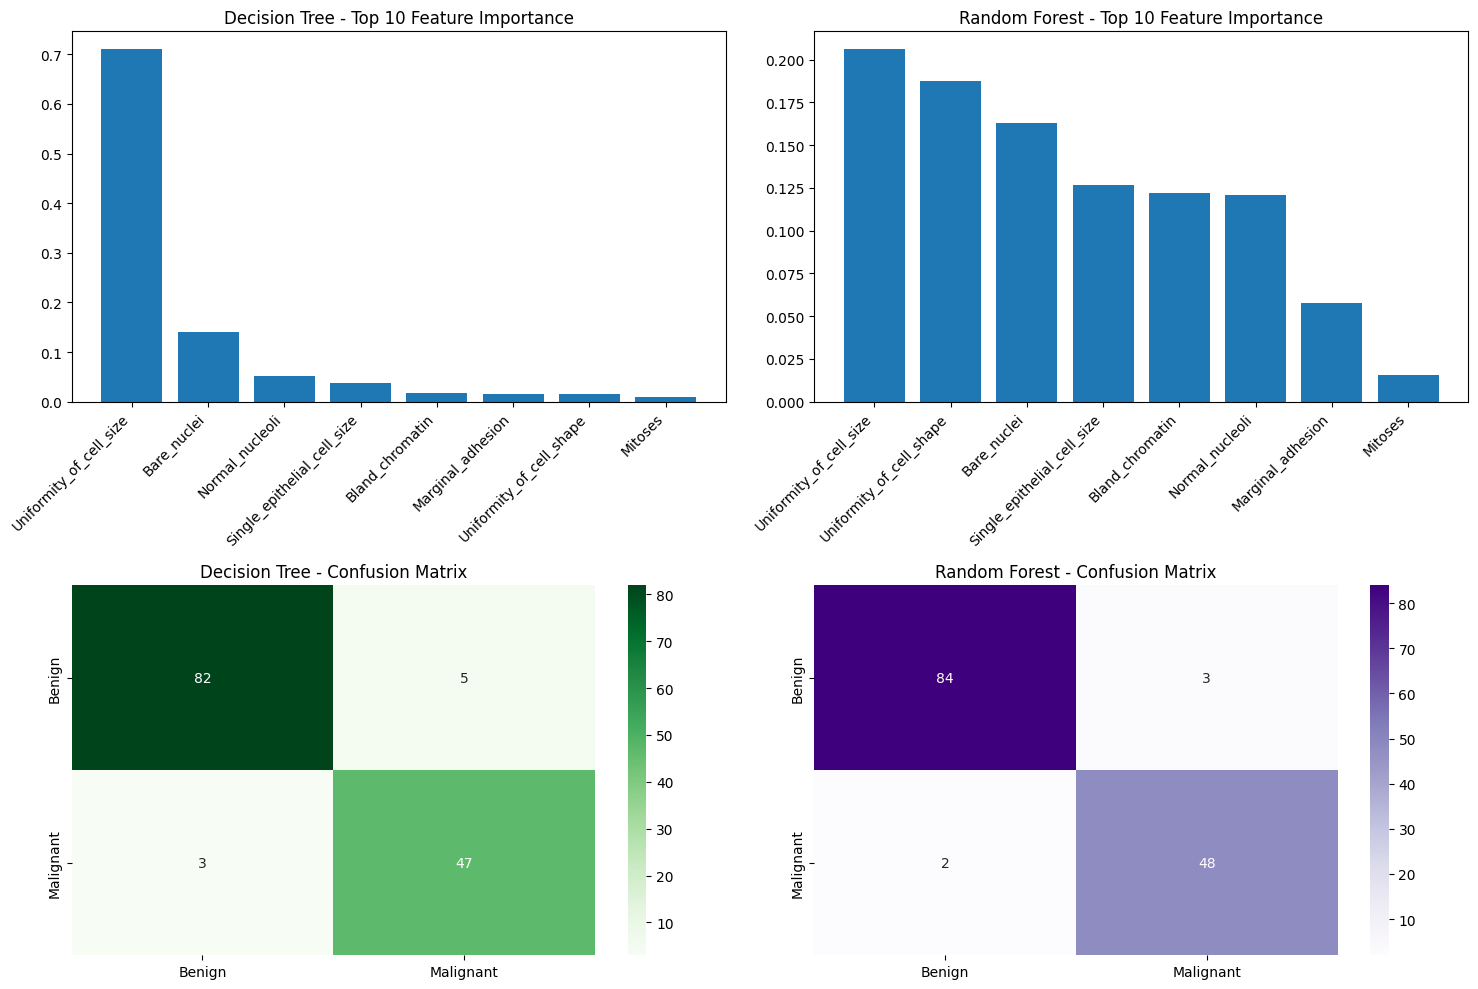


Tree-based Models Summary:
Decision Tree - Test Accuracy: 0.9416
Random Forest - Test Accuracy: 0.9635
Naive Bayes   - Test Accuracy: 0.9416
Decision Tree - Overfitting: 0.0584
Random Forest - Overfitting: 0.0365
Naive Bayes   - Overfitting: 0.0236


In [25]:
# Force reload the visualizer module to get the fix
import importlib
import visualizer
importlib.reload(visualizer)
from visualizer import plot_tree_models_comparison

# Tree Models Visualization using our module
plot_tree_models_comparison(dt_importance, rf_importance, dt_results, rf_results)

print(f"\nTree-based Models Summary:")
print("=" * 35)
print(f"Decision Tree - Test Accuracy: {dt_results['test_accuracy']:.4f}")
print(f"Random Forest - Test Accuracy: {rf_results['test_accuracy']:.4f}")
print(f"Naive Bayes   - Test Accuracy: {nb_results['test_accuracy']:.4f}")
print(f"Decision Tree - Overfitting: {dt_results['overfitting']:.4f}")
print(f"Random Forest - Overfitting: {rf_results['overfitting']:.4f}")
print(f"Naive Bayes   - Overfitting: {nb_results['overfitting']:.4f}")

## 9. Model Persistence (Save/Load Models)

In [26]:
# Debug: Check what models we have
print("Available models in model_results:")
for name in model_results.keys():
    print(f"  - {name}")

print(f"\nAvailable models in all_models:")
for name in all_models.keys():
    print(f"  - {name}")

# Save all trained models using our module
all_results = {}
for model_name, results in model_results.items():
    all_results[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

save_summary = save_all_models(all_results, save_dir="../Models")

print(f"\n✅ All {len(save_summary)} models saved successfully!")
print("Models can be loaded later using model_persistence.load_model()")

Available models in model_results:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes

Available models in all_models:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes
💾 Saving all models...
✅ Model saved successfully:
   Model: ../Models\Logistic Regression_20250719_112801.joblib
   Metadata: ../Models\Logistic Regression_20250719_112801_metadata.json
   Test Accuracy: 0.9489
✅ Model saved successfully:
   Model: ../Models\KNN_20250719_112801.joblib
   Metadata: ../Models\KNN_20250719_112801_metadata.json
   Test Accuracy: 0.9562
✅ Model saved successfully:
   Model: ../Models\SVM Linear_20250719_112801.joblib
   Metadata: ../Models\SVM Linear_20250719_112801_metadata.json
   Test Accuracy: 0.9562
✅ Model saved successfully:
   Model: ../Models\SVM RBF_20250719_112801.joblib
   Metadata: ../Models\SVM RBF_20250719_112801_metadata.json
   Test Accuracy: 0.9489
✅ Mod

In [27]:
# Test Model Loading using our module
print(f"\nTesting Model Loading:")
print("=" * 25)

# Load best model (Random Forest) for testing
loaded_model, loaded_metadata = load_model_by_name('Random Forest', save_dir="../Models")

if loaded_model and loaded_metadata:
    print(f"✅ Model loaded successfully!")
    print(f"Model: {loaded_metadata['model_name']}")
    print(f"Test Accuracy: {loaded_metadata['results']['test_accuracy']:.4f}")
else:
    print("❌ No saved model found")

print(f"\n" + "=" * 50)
print("MODEL PERSISTENCE SUMMARY")
print("=" * 50)
print("✅ All models saved with complete metadata")
print("✅ Models can be loaded independently")
print("✅ Easy to use load_model_by_name() function")
print("✅ Model comparison metrics preserved")
print("=" * 50)


Testing Model Loading:
✅ Model loaded successfully: ../Models\Random Forest_20250719_112801.joblib
   Model Name: Random Forest
   Save Date: 2025-07-19T11:28:01.675194
   Test Accuracy: 0.9635036496350365
✅ Model loaded successfully!
Model: Random Forest
Test Accuracy: 0.9635

MODEL PERSISTENCE SUMMARY
✅ All models saved with complete metadata
✅ Models can be loaded independently
✅ Easy to use load_model_by_name() function
✅ Model comparison metrics preserved


## 10. Comprehensive Model Comparison and Analysis

COMPREHENSIVE MODEL COMPARISON


,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score,Training_Time,Overfitting
0,Logistic Regression,0.9707,0.9489,0.9492,0.9489,0.9490,0.0349,0.0218
1,KNN,0.9707,0.9562,0.9586,0.9562,0.9565,0.0161,0.0145
2,SVM Linear,0.9725,0.9562,0.9570,0.9562,0.9564,0.0260,0.0163
3,SVM RBF,0.9707,0.9489,0.9504,0.9489,0.9492,0.0076,0.0218
4,Decision Tree,1.0000,0.9416,0.9425,0.9416,0.9418,0.0154,0.0584
5,Random Forest,1.0000,0.9635,0.9638,0.9635,0.9636,0.3479,0.0365
6,Naive Bayes,0.9652,0.9416,0.9465,0.9416,0.9422,0.0041,0.0236



📋 MODEL ANALYSIS SUMMARY REPORT
Generated on: 2025-07-19 11:30:52
Total Models Evaluated: 7

🏆 BEST OVERALL MODEL: Random Forest
   Test Accuracy: 0.9635
   Precision: 0.9638
   Recall: 0.9635
   F1-Score: 0.9636

📈 PERFORMANCE TIERS:
   Excellent (≥97%): 
   Good (95-97%): KNN, SVM Linear, Random Forest
   Average (<95%): Logistic Regression, SVM RBF, Decision Tree, Naive Bayes

⚠️  OVERFITTING ANALYSIS:
   Models showing overfitting: Decision Tree

⚡ TRAINING SPEED ANALYSIS:
   Fastest: Naive Bayes (0.0041s)
   Slowest: Random Forest (0.3479s)

💡 RECOMMENDATIONS:
   For Production: Random Forest (Best balance of accuracy and reliability)



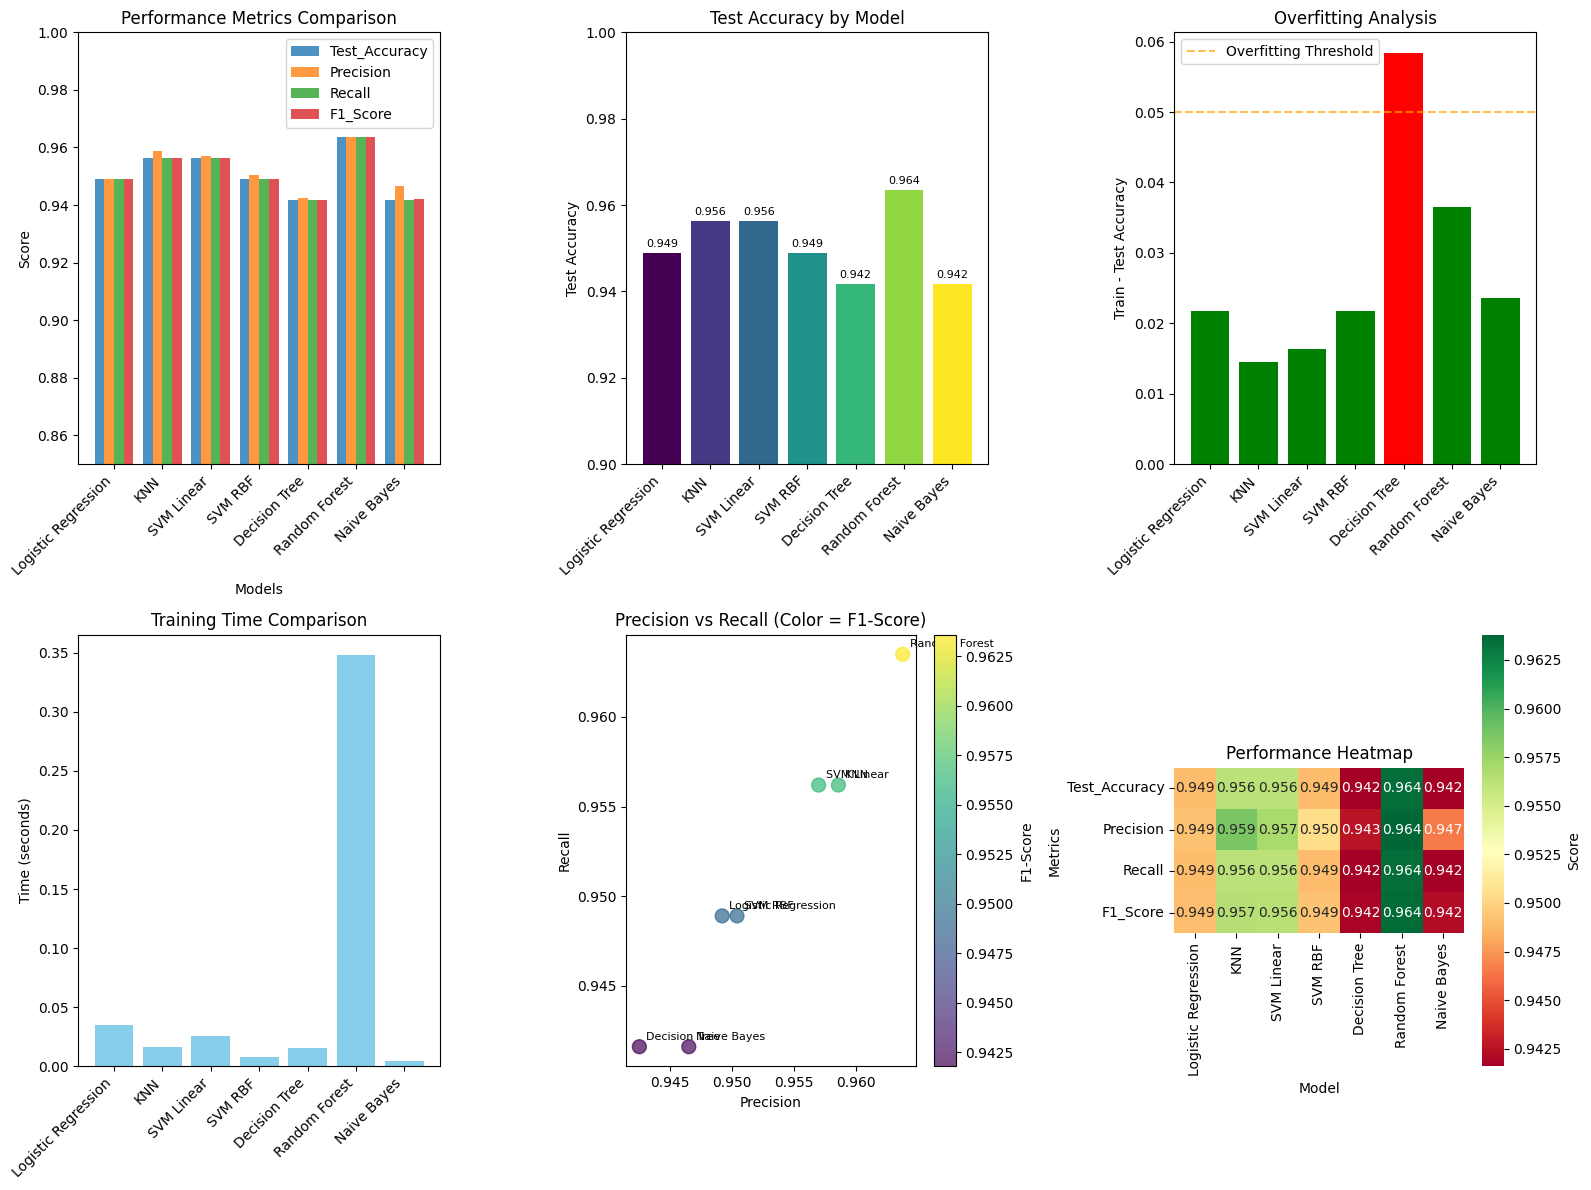

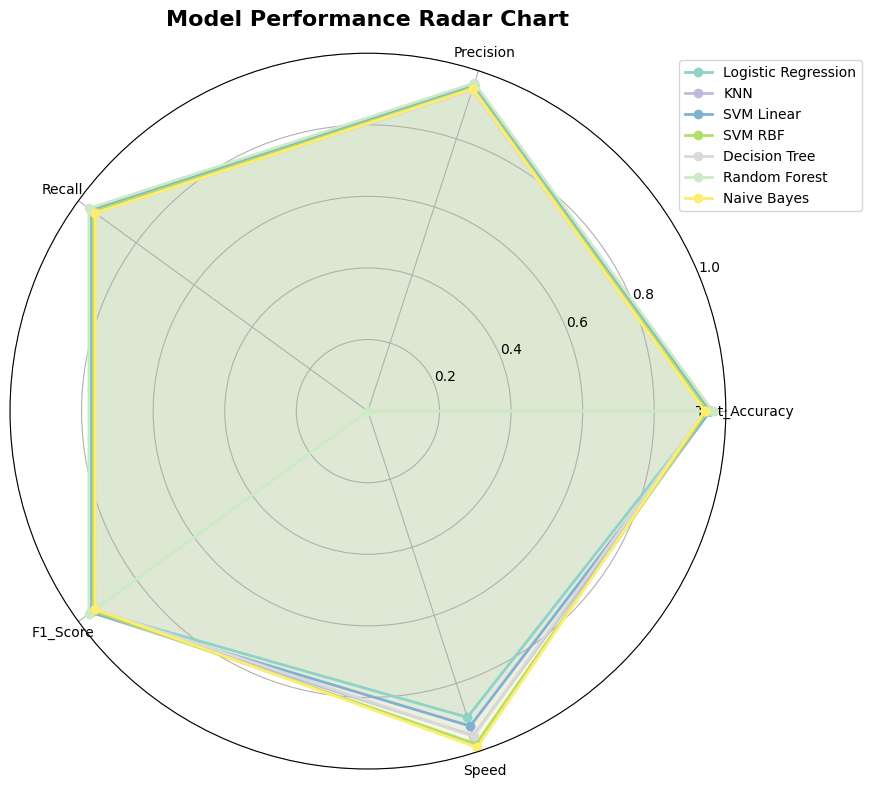

In [31]:
# Reload modules to get fixes
import importlib
import model_comparison
importlib.reload(model_comparison)
from model_comparison import create_performance_radar_chart

# Create comprehensive comparison using our module  
all_results_for_comparison = {}
for model_name, results in model_results.items():
    all_results_for_comparison[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

comparison_df = create_comparison_dataframe(all_results_for_comparison)

print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)
display(comparison_df.round(4))

# Generate detailed analysis using our module
generate_model_summary_report(comparison_df, all_results_for_comparison)

# Create comprehensive visualizations using our module
plot_comprehensive_comparison(comparison_df, figsize=(16, 12))

# Create performance radar chart using our module
create_performance_radar_chart(comparison_df, figsize=(12, 8))